In [5]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series

from sklearn import datasets, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
import seaborn as sns

# 보스턴 주택데이터
* 해당자료는 클러스터링이 아닌, 회귀예측을 위한 연습자료
* (이미 분류된)정형화된 자료가 아닌, 현실의 클러스터링에 가까운 자료
* 506개의 레코드와 13개의 변수로 구성

In [6]:
X, y = datasets.load_boston(return_X_y=True)
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

# 데이터 스케일링 (평균 0 / 표준편차 1 로 데이터를 스케일링)
* 각 변수마다 자료의 척도가 다르기 때문에, 클러스터링시 문제가 발생할 수 있음
* 원칙적으로 자료는 탐색한 후, 자료에 맞는 스케일링을 실시 (여기에서는 임의로 스탠더드 스케일링을 실시)

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

# 클러스터링 크기에 따른 평가지수(Silhouette, Davies-Bouldin)
* 클러스터링은 비지도학습으로 평가측정이 어려움
* 일반적으로 Silhouette(높은수록 좋음 / 0.5 이상), Davies-Bouldin(낮을수록 좋음 / 최소값 0) 점수이용
* 그러나 위 점수는 클러스터가 모여있다는 가정하에, 클러스터의 모양을 판단함 (실제 클러스터링 목적과 부합하지 않을 수 있음)
* 여기에서는 계층군집화(개별사례 간 유사도를 측정하여 클러스터링)을 2~10개의 클러스터로 시행

In [9]:
max_clusters = 10
clustering_eval = []

for ix in range(2, max_clusters+1):
    clustering = AgglomerativeClustering(n_clusters=ix)
    y_pred = clustering.fit_predict(X_scaled)

    val1 = metrics.silhouette_score(X_scaled, y_pred)
    val2 = metrics.davies_bouldin_score(X_scaled, y_pred)
    
    clustering_eval.append([ix, val1, val2])

clustering_eval = DataFrame(clustering_eval, 
                            columns=['n_cluster', 'silhouette', 'davies'])
clustering_eval

,n_cluster,silhouette,davies
0,2,0.339699,1.138924
1,3,0.250128,1.572650
2,4,0.262627,1.382781
3,5,0.241938,1.352400
4,6,0.244314,1.303215
5,7,0.241577,1.366867
6,8,0.261542,1.266668
7,9,0.248300,1.270205
8,10,0.260795,1.216554


# 클러스터링 크기에 따른 평가지수(Silhouette, Davies-Bouldin)
* 점수에 의하면, 2개의 클러스터로 나누는 것이 이상적이라고 판단됨
* 그러나 실제 자료는 매우 다양한 형태이기 때문에, 클러스터링을 여러번 시도하고, 자료를 해석해서 클러스터링을 선택해야함

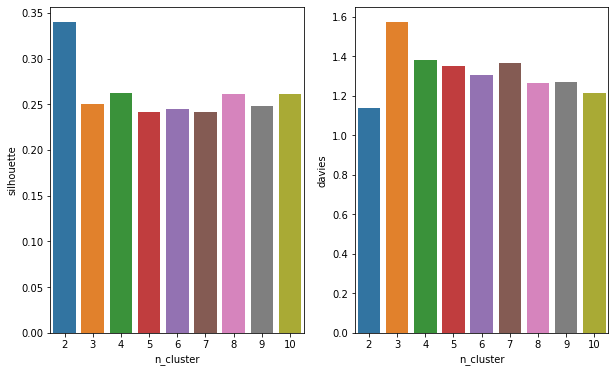

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
sns.barplot(data=clustering_eval, x='n_cluster', y='silhouette', ax=ax[0])
sns.barplot(data=clustering_eval, x='n_cluster', y='davies', ax=ax[1])
plt.show()

# 클러스터링 결과 (2~10 클러스터)

In [11]:
y_pred = []

for ix in range(2, max_clusters+1):
    clustering = AgglomerativeClustering(n_clusters=ix)
    y_temp = clustering.fit_predict(X_scaled)
    y_pred.append(y_temp)

y_pred

[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

# 차원축소 Manifold(T-SNE)로 2차원으로 클러스터링을 비교
* 원칙적으로 클러스터링별 자료를 해석하는 것이 원칙이나 여기서는 생략함
* 차원축소로 클러스터링을 비교하는 것은 위험성이 높음<br/>(차원축소의 경우, 다차원의 자료에 기반하기 때문에 축소시 자료해석에 손실이 발생할 가능성이 높음)
* 현실세계의 자료는 자료해석시 클러스터링이 잘된 것으로 판단될 수 있으나, 차원축소된 그래프로는 명확히 나눠지지 않는 경우도 발생함
* 앞선 지표에 의해서 클러스터 개수를 정하더라도, 실제 클러스터링을 판단/결정하는 것은 분석가의 주관적 판단이 필요함

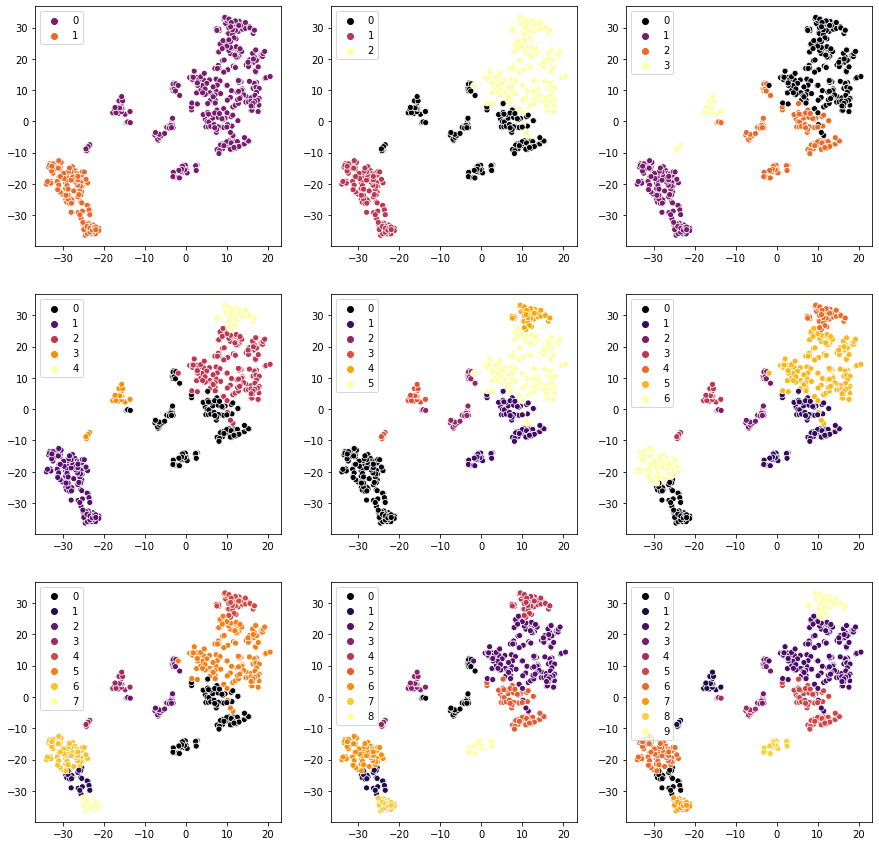

In [13]:
# 13개의 Features를 2개 차원으로 압축
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X_scaled)

# Plot 생성
ix = 0
fig, ax = plt.subplots(3, 3, figsize=(15, 15))

for n_row in range(3):
    for n_col in range(3):
        sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y_pred[ix],
                        legend='full', ax=ax[n_row, n_col], palette='inferno')
        ix += 1
plt.show()